
# Task: To Determine the eligiblity of loan status

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import chi2_contingency # categorical Vs categorical
from scipy.stats import ttest_ind # numeric Vs categorical

In [4]:
df=pd.read_csv('loan.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Why is Dependents column has object datatype? Lets Look into it.
#Its a ordinal feature since it respects order
df['Dependents'].value_counts()
#Its because we have a character in our feature

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
#Dropping loan_id column since its not useful
data=df.drop('Loan_ID',axis=1)

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The difference between the median and mean is significantly high and mean is shifted more towards higher side.
Hence,The outliers are on the right side.Right skewed data for applicant income.

In [10]:
data.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


There are missing values in our dataset at its visible from the counts here

In [11]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Storing the categorical and numerical features

num_cols=data.dtypes!='object'
num_cols=list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [13]:
cat_cols=data.dtypes=='object'
cat_cols=list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [14]:
#Removing target variable
cat_cols.remove('Loan_Status')

# Univariate Analysis

In [15]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

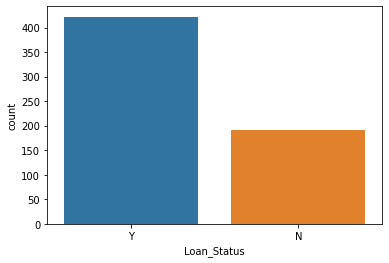

In [16]:
sns.countplot(data['Loan_Status'])

In [17]:
#We can think of if the data is more inclined towards Yes which means most people who came for loan got the loan.It possible that 
#data is a sample of a population 


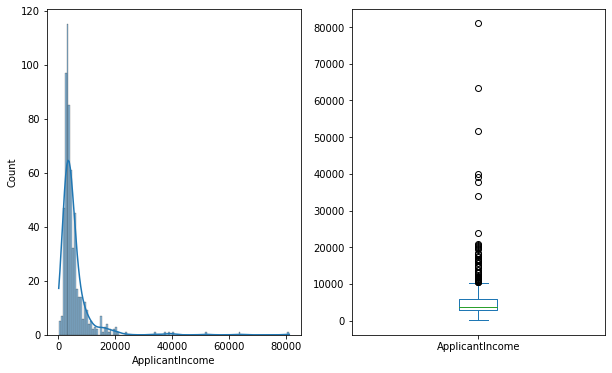

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(data['ApplicantIncome'],kde=True)
plt.subplot(122)
data['ApplicantIncome'].plot(kind='box')
plt.show()

The data is right skewed and have some outliers

Applying log normal transformation on the data to make it normal.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

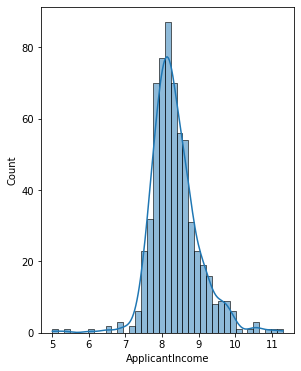

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(np.log(data['ApplicantIncome']),kde=True)

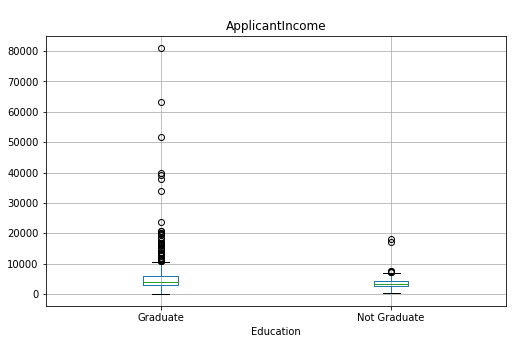

In [20]:
data.boxplot(column='ApplicantIncome',by='Education',figsize=(8,5))
plt.suptitle(" ")
plt.show()

In [21]:
data.groupby("Loan_Status").mean()['ApplicantIncome']

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

The average income of people with loan status no have higher average income which seems counter intuitive so their exists some other corelation as income alone is not responsible for getting a loan

Text(0, 0.5, 'Mean Income of Applicant')

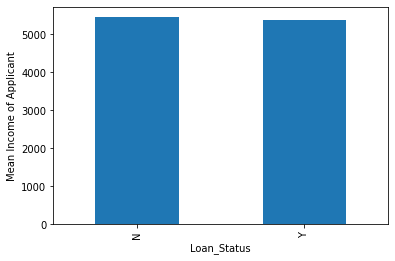

In [22]:
data.groupby("Loan_Status").mean()['ApplicantIncome'].plot(kind='bar')
plt.ylabel('Mean Income of Applicant')

In [23]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'h2', 'h3', 'h4' , 'Very high']

In [24]:
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)

In [25]:
val = pd.crosstab(data["Income_bin"],data["Loan_Status"])
val

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
medium,45,98
H1,20,34
h2,9,22
h3,13,27
h4,3,6
Very high,1,2


In [26]:
# H0: No relation between Income_bin and Loan_Status
#H1: Relation between Income_bin and Loan_Status
chi2_contingency(val)

(1.2420001711303135,
 0.9899274842922701,
 7,
 array([[ 33.77198697,  74.22801303],
        [ 70.67100977, 155.32899023],
        [ 44.71661238,  98.28338762],
        [ 16.88599349,  37.11400651],
        [  9.69381107,  21.30618893],
        [ 12.50814332,  27.49185668],
        [  2.81433225,   6.18566775],
        [  0.93811075,   2.06188925]]))

the p value is greater than 0.5 for 95 percent confidence intreval that means, failed to reject the null hypothesis.Hence there is no relation among income bin and Loan status

In [27]:
pd.crosstab(data["Income_bin"],data["Loan_Status"]).sum(axis=1)

Income_bin
Low          108
Average      226
medium       143
H1            54
h2            31
h3            40
h4             9
Very high      3
dtype: int64

<AxesSubplot:xlabel='Income_bin'>

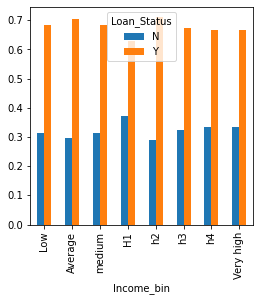

In [28]:
ct = pd.crosstab(data["Income_bin"], data["Loan_Status"], normalize='index')

# plot the table as a bar graph
ct.plot(kind="bar", figsize=(4,4))

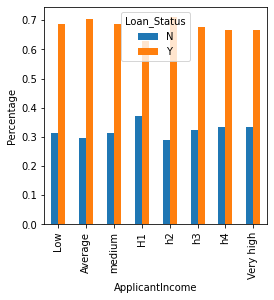

In [29]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

Visually also it is visible that even in high income bins percentage of getting and not getting loans is not relatable with increasing income

T test to check whether income has any relation in getting loans

In [30]:
a = data[data["Loan_Status"]=="Y"]["ApplicantIncome"]
b = data[data["Loan_Status"]=="N"]["ApplicantIncome"]

In [31]:
a.mean()

5384.068720379147

In [32]:
b.mean()

5446.078125

In [33]:
# H0: mean of a = mean of b (no difference among the two groups)
ttest_ind(a, b)

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

In [34]:
data['Loan_Amount_per_year'] = data['LoanAmount']/data['Loan_Amount_Term']

In [35]:
data['Total income']=data["ApplicantIncome"] + data["CoapplicantIncome"]


In [36]:
#Getting per month amount 
data['EMI'] = data['Loan_Amount_per_year']*1000/12 
# Loan amount was in 1000's of dollars

In [37]:
data['Able_to_pay_EMI']=(data['EMI']<data['Total income']*.01).astype('int')
data['Able_to_pay_EMI']

0      0
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Name: Able_to_pay_EMI, Length: 614, dtype: int32

<AxesSubplot:xlabel='Able_to_pay_EMI', ylabel='count'>

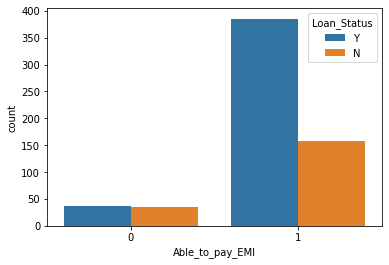

In [38]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

In [39]:
val = pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status'])
val

Loan_Status,N,Y
Able_to_pay_EMI,,
0,35,37
1,157,385


In [40]:
chi2_contingency(val)

(10.516240615281223,
 0.001183299634284223,
 1,
 array([[ 22.51465798,  49.48534202],
        [169.48534202, 372.51465798]]))

Since value of p is less than 0.05 and we reject Null hypothesis.
Hence we conclude 
that Able to pay emi and Getting loan or not is highly related

Dependents and Loan approval



In [41]:
data['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [42]:
data['Dependents'].replace({'3+':3},inplace=True)

In [43]:
data['Dependents'] = data['Dependents'].astype('float')


<AxesSubplot:xlabel='Dependents', ylabel='count'>

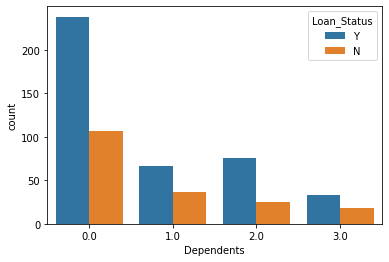

In [44]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data)

In [45]:
k=pd.crosstab(data['Dependents'],data['Loan_Status'])

In [46]:
chi2_contingency(k)
#p value is greater than 0.05 hence number of dependents and loan status are dependent on each other

(3.158339770698263,
 0.3678506740863211,
 3,
 array([[107.12854758, 237.87145242],
        [ 31.67278798,  70.32721202],
        [ 31.36227045,  69.63772955],
        [ 15.83639399,  35.16360601]]))

# Credit History

Approval rate is 80.0 % higher if you have a credit history


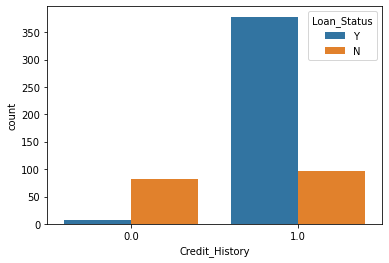

In [47]:
sns.countplot(data =data, x = 'Credit_History', hue = 'Loan_Status')
#Observation:
## We can clearly see that the approval rate is significantly higher if your credit history is aligned with the guidlines.
## Hence this is the most important question that can be considered.
print("Approval rate is",400/500*100 ,"% higher if you have a credit history")

# Missing values Treatment

In [48]:
def missing_values(df):
    number_of_null=df.isnull().sum()
    percent_null = (df.isnull().sum() / len(df)) * 100
    null_per=pd.concat([number_of_null,percent_null ],axis=1,keys=['number_of_null','percent_null'])
    return null_per

In [49]:
 
df.isnull().count()

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

In [50]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
missing_df=missing_values(data)
missing_df[missing_df['number_of_null']>0]

,number_of_null,percent_null
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130
Credit_History,50,8.143322
Loan_Amount_per_year,36,5.863192
EMI,36,5.863192


Treatment of missing values


In [52]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [53]:
#Filling a value 2  
data['Credit_History'].fillna(2,inplace=True)

In [54]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [55]:
data['Self_Employed'] = data['Self_Employed'].fillna('Other')


In [56]:
#Using simple imputer to subsitute nan values

In [57]:
#Filling the nan values in numerical columns with median values.
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='median')
num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']
for col in num_missing:
    data[col]=pd.DataFrame(median_imputer.fit_transform(data[col].values.reshape(-1,1)))


In [58]:
#Filling nan values with Highest Freq value for categorical columns.
cat_missing = ['Gender', 'Married','Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [59]:
!pip install category_encoders



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Encoding the categorical columns

In [60]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
col='Loan_Status'
data[col] = label_encoder.fit_transform(data[col])



In [61]:
from category_encoders import TargetEncoder

te = TargetEncoder()
data['Property_Area'] = te.fit_transform(data[col], data['Loan_Status'])

data['Property_Area'].value_counts()

1    422
0    192
Name: Property_Area, dtype: int64

In [ ]:
for col in ['Gender','Married','Education','Self_Employed']:
    label_encoder = LabelEncoder()
    
    data[col] = label_encoder.fit_transform(data[col])

In [62]:
#Task: Compute Correlation (PCC and SRCC) between each feature and the Loan-Status

<AxesSubplot:>

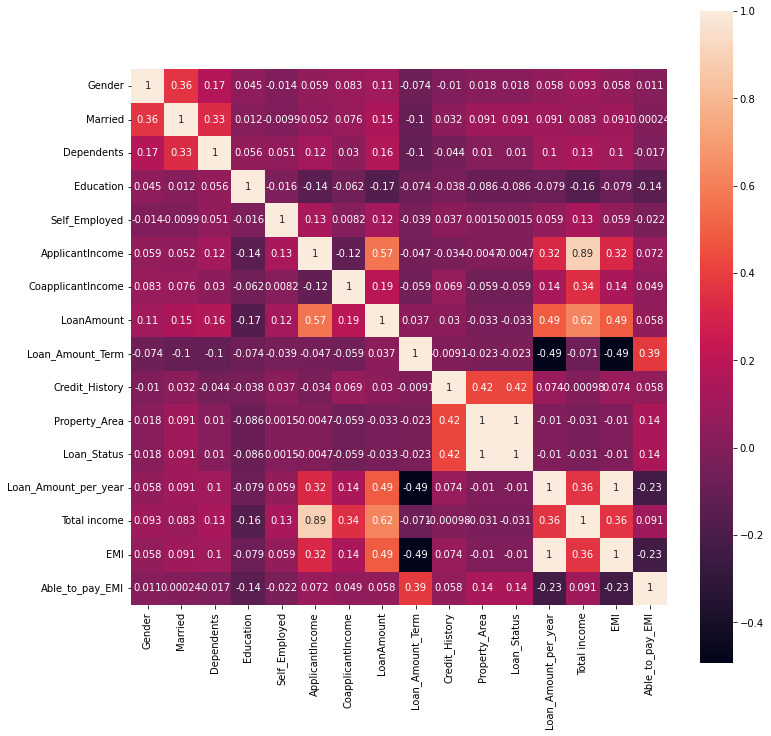

In [64]:
#PCC
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(method='pearson'), square=True,annot=True)

<AxesSubplot:>

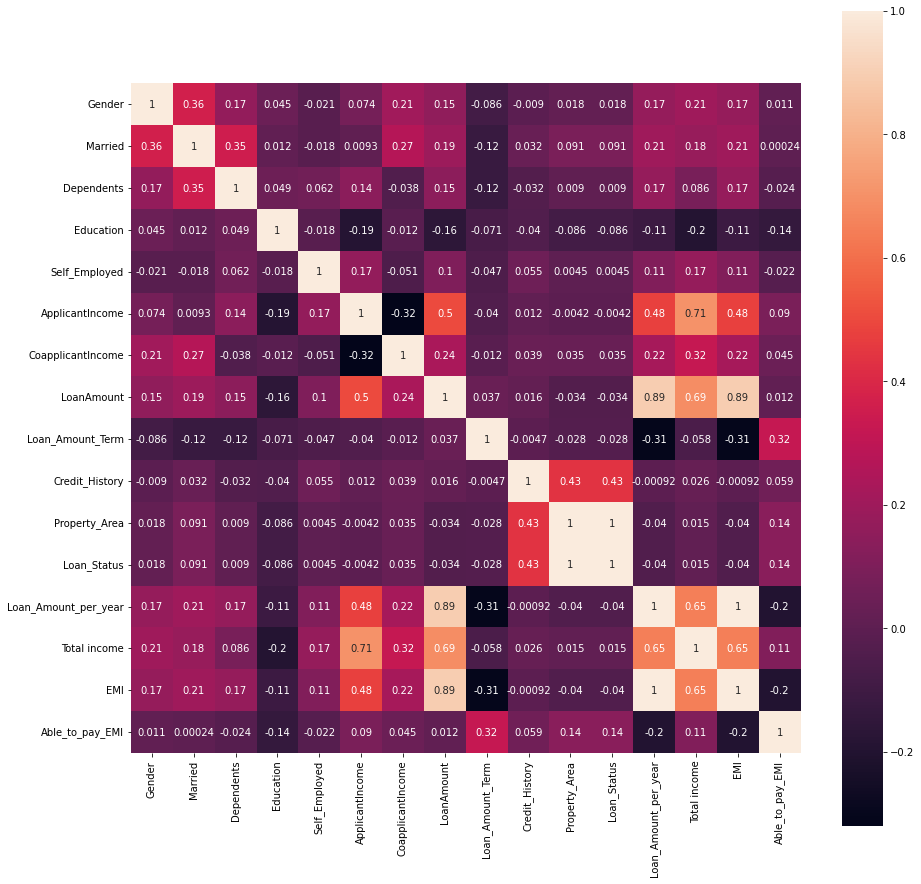

In [65]:
#SRCC
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(method='spearman'), square=True,annot=True)